In [2]:
# import all necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random

# perform all the necessary steps to produce a standard run and save it to .tsv

In [3]:
# define standard bar orientations, create an empty list for the trials

# PRF stimulus settings:    
bar_pass_steps = 20                # number of steps the bar takes to traverse the aperture
blanks_length = 10                  # length of interbar periods (-1 in orientation). like bar pass steps, in units of TRs or bar step length
bar_orientations = np.array([-1, 0, 90, -1, 180, 270,  -1, 0, 90, -1, 180, 270,  -1, 0, 90, -1, 180, 270,-1]) 
bar_step_length = 5                # in seconds. this is only used if Scanner sync is set to False
operating_system = 'mac'
win_size = np.array([3840, 2160])

In [4]:
# define the number of trials

trial_number = 10 + bar_pass_steps*len(np.where(bar_orientations != -1)[0]) + blanks_length*len(np.where(bar_orientations == -1)[0])

print('Expected number of TRs are:', trial_number)


Expected number of TRs are: 320


In [5]:
# Create a list of the TR's per barpass or blank, blank lengths can easily be altered here.
# From this list create the orientation of the bar at each TR

steps_array = bar_pass_steps*np.ones(len(bar_orientations))
blanks_array = blanks_length*np.ones(len(bar_orientations))

repeat_times = np.where(bar_orientations == -1, blanks_array, steps_array).astype(int)
print(repeat_times)

bar_orientation_at_TR = np.concatenate((-1*np.ones(10), np.repeat(bar_orientations, repeat_times)))


[10 20 20 10 20 20 10 20 20 10 20 20 10 20 20 10 20 20 10]


In [6]:
# define arrays for the bar positions and blanks, the bar positions array depends on whether code is run on mac

if operating_system == 'mac':
    bar_pos_array = (win_size[1]/2)*np.linspace(-0.5,0.5, bar_pass_steps)
else:
    bar_pos_array = win_size[1]*np.linspace(-0.5,0.5, bar_pass_steps)

blank_array = np.zeros(blanks_length)

In [7]:
# define the bar position in each orientation

bar_pos_in_ori = np.zeros(10)

for i in range(len(bar_orientations)):
    if bar_orientations[i] == -1:
        bar_pos_in_ori = np.append(bar_pos_in_ori, blank_array)
    else:
        bar_pos_in_ori = np.append(bar_pos_in_ori, bar_pos_array)
# print(bar_pos_in_ori)

# define the bar direction at each TR
bar_direction_at_TR = np.round(np.random.rand(trial_number))
# print(bar_direction_at_TR)

In [8]:
# Create the eventual trial list, from which each run can be defined
# The trial list will be loaded into a tsv file

trial_list = {"orientation_at_TR":[], 'pos_in_ori_at_TR':[], "direction_at_TR":[]}

for i in range(trial_number):
    trial_list['orientation_at_TR'].append(bar_orientation_at_TR[i])
    trial_list['pos_in_ori_at_TR'].append(bar_pos_in_ori[i])
    trial_list['direction_at_TR'].append(bar_direction_at_TR[i])
    
df = pd.DataFrame(trial_list)

os.makedirs('run_list', exist_ok = True)
df.to_csv('run_list/standard_run.tsv', sep='\t', index=True, na_rep='NA')


# Download the standard run and plot it so it visualizes the run

In [9]:
data = np.genfromtxt(fname="run_list/standard_run.tsv", delimiter="\t", skip_header=1, filling_values=1)

standard_run = np.delete(data, 0, 1) 
print(standard_run)

[[  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            0.        ]
 [  -1.            0.            1.        ]
 [   0.         -540.            0.        ]
 [   0.         -483.15789474    0.        ]
 [   0.   

In [10]:
distance = standard_run[20:40,1]

print(distance)
for i in range(19):
    l = np.array(distance[(i+1)] - distance[i])
    print(np.around(l, 12))

[-540.         -483.15789474 -426.31578947 -369.47368421 -312.63157895
 -255.78947368 -198.94736842 -142.10526316  -85.26315789  -28.42105263
   28.42105263   85.26315789  142.10526316  198.94736842  255.78947368
  312.63157895  369.47368421  426.31578947  483.15789474  540.        ]
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158
56.842105263158


In [11]:
def show_runs(run):
    """plot the runs for the prf checkers experiment with 0 and 180 being horizontal barpasses, from left to right and opposite, respectively, 
    and 90 and 270 degrees being vertical, downwards and upwards, respectively. 
    The run needs to be in an array, with in the first column a column with the angle of the barpass and in the second column, the positions of the bar"""

    # First, make arrays necessary for the plotting of the barpasses, with the positions of all the bars
    positions = [-540.0, -483.1578947368421, -426.3157894736842, -369.4736842105263, -312.63157894736844, -255.78947368421055, -198.94736842105266, -142.10526315789477, -85.26315789473686, -28.421052631578977, 28.421052631578917, 85.26315789473686, 142.1052631578947, 198.94736842105254, 255.7894736842105, 312.63157894736844, 369.47368421052624, 426.3157894736841, 483.157894736842, 540.0]
    pos_forwards = np.array((range(20), positions))
    pos_backwards = np.array((range(19,-1,-1), positions))
    
    # Create empty arrays to alter with the bar positions of the run and create the figure with the different subplots  
    arrays = [np.zeros((20, 20)) for _ in range(len(run[:,1]))]
    height_of_run = int(len(run[:,1])/20)
    fig, axs = plt.subplots(height_of_run, 20, figsize=(20, height_of_run))

    # Edit the arrays to that the values of the position of the bar at that moment becomes a 1 
    for i, value in enumerate(run[:,0]):

        for j, position in enumerate(pos_forwards[1,:]):
            if run[i,1] == position:
                line = int(pos_forwards[0,j])

                if value == 0:
                    arrays[i][:,line] = 1

                elif value == 90:
                    arrays[i][line,:] = 1

        for j, position in enumerate(pos_backwards[1,:]):
            if run[i,1] == position:
                line = int(pos_backwards[0,j])

                if value == 180:
                    arrays[i][:,line] = 1

                elif value == 270:
                    arrays[i][line,:] = 1

    # Iterate through the 2D arrays and display each one in a subplot
    for ax, array in zip(axs.flat, arrays):
        ax.imshow(array, cmap = 'magma')
        ax.axis('off')

    plt.show()



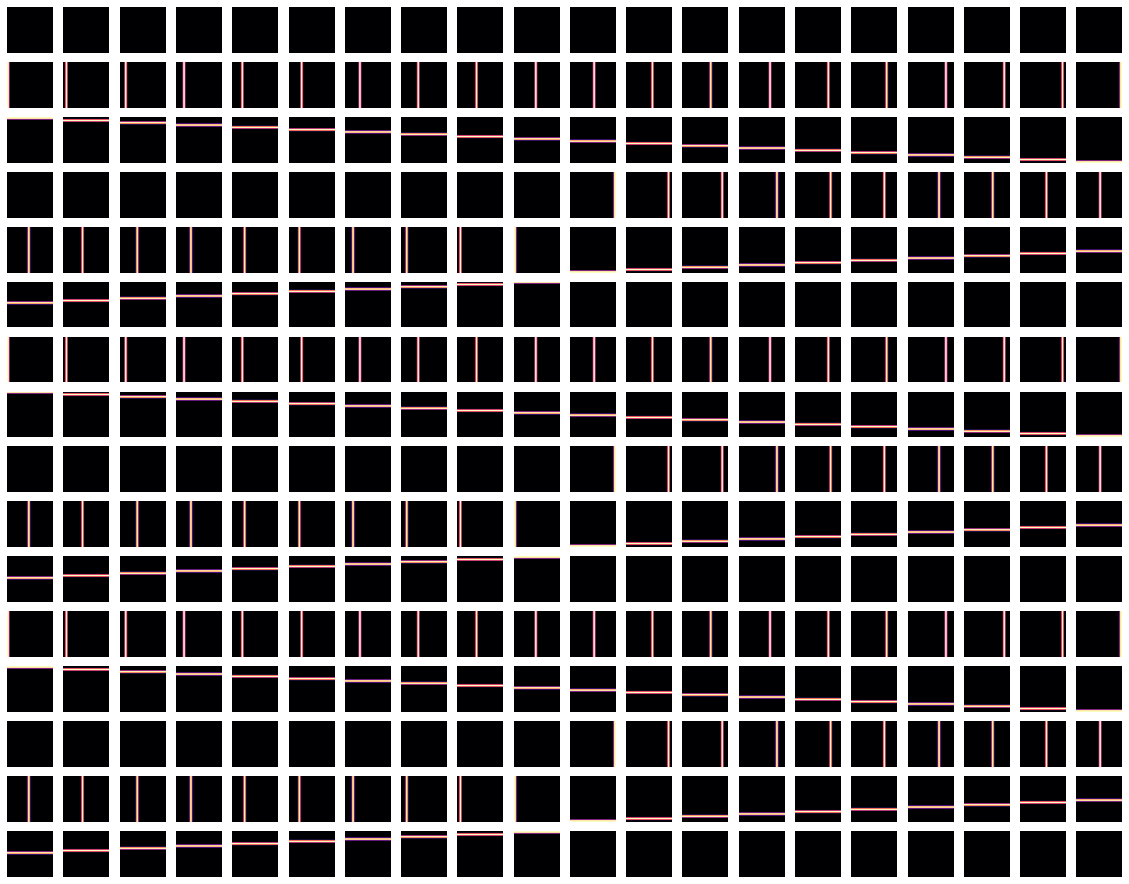

In [12]:
show_runs(standard_run)

# Make functions to create runs with random violations, in which all positions are used as a violation at least once, and to be able to save it to .tsv

In [13]:
def random_violations():
    """create two arrays, the first horizontal, the second vertical, with randomly shuffled violations in all the possible bar positions"""
    
    positions = [-540.0, -483.1578947368421, -426.3157894736842, -369.4736842105263, -312.63157894736844, -255.78947368421055, -198.94736842105266, -142.10526315789477, -85.26315789473686, -28.421052631578977, 28.421052631578917, 85.26315789473686, 142.1052631578947, 198.94736842105254, 255.7894736842105, 312.63157894736844, 369.47368421052624, 426.3157894736841, 483.157894736842, 540.0]
    
    # Create empty arrays with two columns to make the violations, the first column is the orientation (vertical = 0, horizontal = 90) and the second column are the violation values  
    violations_hori = np.zeros((20,2))
    violations_verti = np.zeros((20,2))
    violations_verti[:,0] = 90.0

    # randomly shuffle the violations to create random violations of the standard run and return these arrays     
    random.shuffle(positions)    
    violations_hori[:,1] = positions

    random.shuffle(positions)
    violations_verti[:,1] = positions

    return violations_hori, violations_verti

In [14]:
(horizontal_violations, vertical_violations) = random_violations()

In [15]:
# There are different ways to do this, there should be a faster/more efficient way to program this, but it works

def violated_runs(normal_run, hori_violations, verti_violations):
    """Create an array for the run with violations. 
    normal_runs is the original PRF-checkers experiment array, with no violations (length does not matter) horizontal- and vertical violations are the arrays with the violations. 
    This function ensures that violations only occur in the orthoganol orientation. 
    The violations only occur maximal every 6 barpositions, they do not occur at the first or last position and they do not occur within 2 positions of another."""    
    
    # get the indices of all bar positions and the individual vertical and horizontal bar positions, so that the violation positions can be calculated    
    pos_total = []
    pos_vertical = []
    pos_horizontal = []
    
    for i, value in enumerate(normal_run[:,0]):
        if value == 0 or value == 90 or value == 180 or value == 270:
            pos_total.append(i)

    for i, value in enumerate(normal_run[:,0]):
        if value == 0 or value == 180:
            pos_vertical.append(i)
        elif value == 90 or value ==270:
            pos_horizontal.append(i)
            
    # There are now 240 values in pos_total, we want to make another list with every first and last index of the barpass.
    # We will then use these values to ensure the violation does not fall on this value.
    s_and_e = []
    start = 0
    end = 19
    for i, value in enumerate(pos_total):
        if i == start:
            s_and_e.append(value)
            start += 20
        elif i == end:
            s_and_e.append(value)
            end += 20


    # there should be one violation every six positions, so we loop over all positions, we then calculate the index of the position we want
    # the index in a random position between position 2-5, so that the're are minimally two positions between violations
    # for each of these positions, we can then insert a violation in the orthoginal direction in a new 'violated' run 

    hori_batch = 0
    verti_batch = 0
    batch_size = 6 
    violated_run = normal_run.copy()

    for i, h_violation in enumerate(hori_violations[:,1]):
        violation_pos_h = np.random.randint(1,5)
        hori_viol_pos = hori_batch + violation_pos_h
        index = pos_vertical[hori_viol_pos]

    # ensure that the index is not at the start or end of a barpass
        while index in s_and_e:
            violation_pos_h = np.random.randint(1,5)
            hori_viol_pos = hori_batch + violation_pos_h
            index = pos_vertical[hori_viol_pos]

        violated_run[index,1] = h_violation
        violated_run[index,0] = 90
        hori_batch += batch_size

    for i, v_violation in enumerate(verti_violations[:,1]):
        violation_pos_v = np.random.randint(1,5)
        verti_viol_pos = verti_batch + violation_pos_v
        index = pos_horizontal[verti_viol_pos]

    # ensure that the index is not at the start or end of a barpass
        while index in s_and_e:
            violation_pos_v = np.random.randint(1,5)
            verti_viol_pos = verti_batch + violation_pos_v
            index = pos_horizontal[verti_viol_pos]

        violated_run[index,1] = v_violation
        violated_run[index,0] = 0
        verti_batch += batch_size
        
    return violated_run  

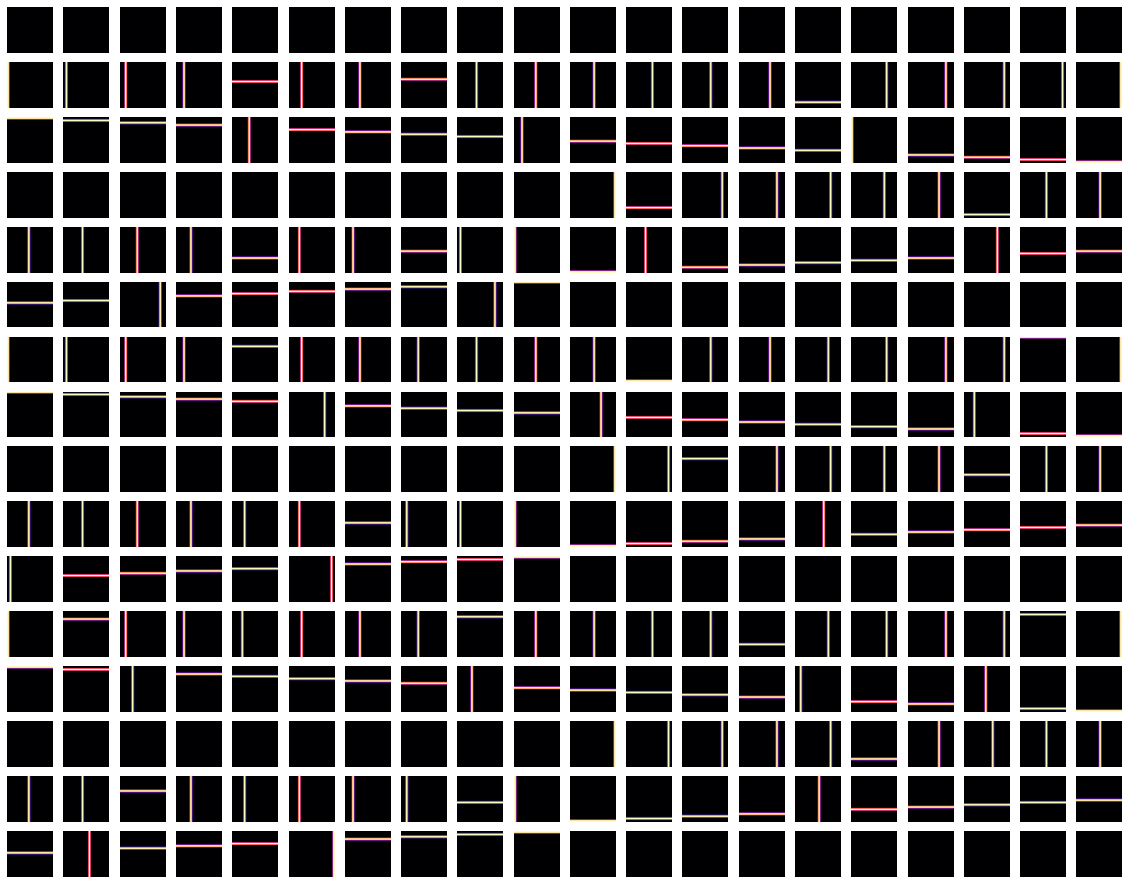

In [16]:
# run_ = violated_runs(standard_run, horizontal_violations, vertical_violations)
show_runs(violated_runs(standard_run, horizontal_violations, vertical_violations))

In [17]:
def put_in_tsv(run,tsv_name = 'run_list/violated_run.tsv'):
    """save a run that is now set in a numpy array with shape (375,3) into a tsv file for exportation to the PRF experiment"""
    list1 = []
    list2 = []
    list3 = []

    for i, value in enumerate(run[:,0]):
        list1.append(value)
        list2.append(run[i,1])
        list3.append(run[i,2])
        
    trial_list = {"orientation_at_TR":[], 'pos_in_ori_at_TR':[], "direction_at_TR":[]}
    
    for i in range((len(list1))):
        trial_list['orientation_at_TR'].append(list1[i])
        trial_list['pos_in_ori_at_TR'].append(list2[i])
        trial_list['direction_at_TR'].append(list3[i])
    
    df = pd.DataFrame(trial_list)

    df.to_csv(tsv_name, sep='\t', index=True, na_rep='NA')


# Create a test violated run and save it as a .tsv file, then reload it as a test

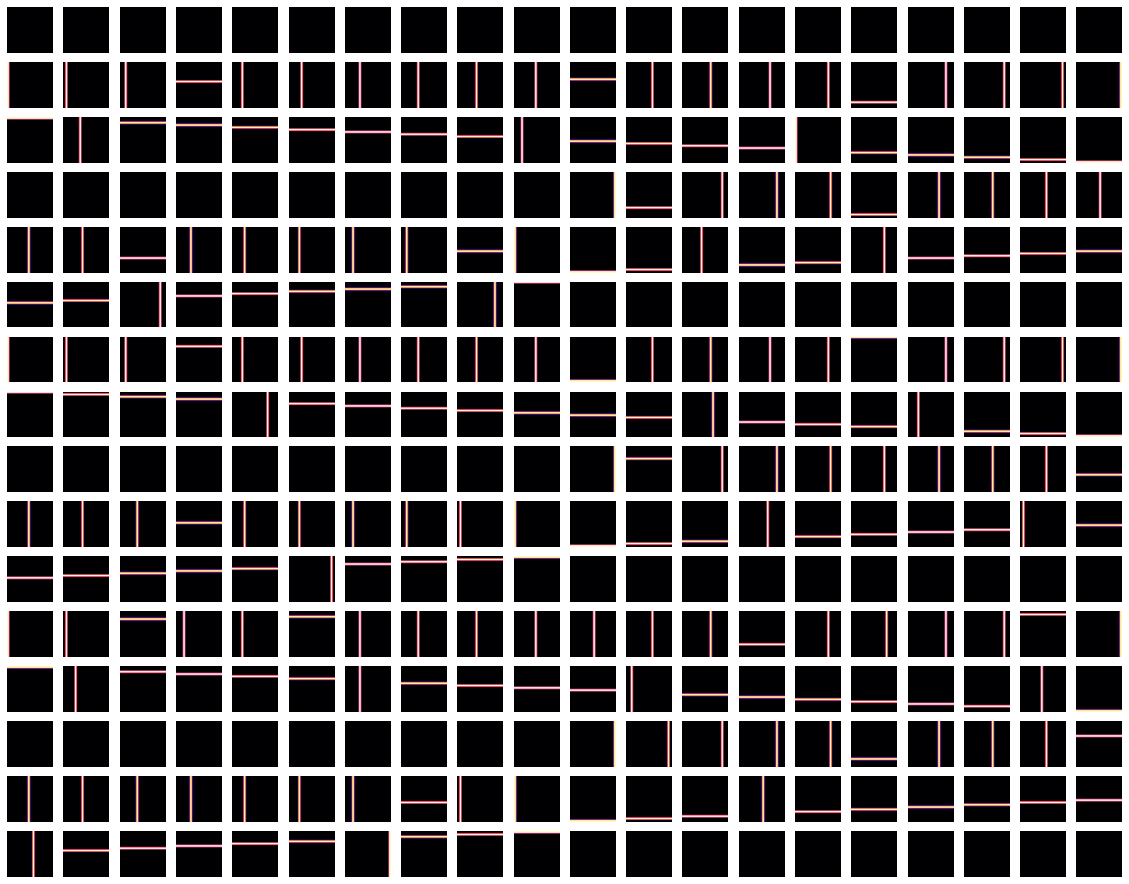

In [18]:
violated_run = violated_runs(standard_run, horizontal_violations, vertical_violations)
put_in_tsv(violated_run, 'run_list/violated_run.tsv')
data_ = np.genfromtxt(fname="run_list/violated_run.tsv", delimiter="\t", skip_header=1, filling_values=1)

violated_run_ = np.delete(data_, 0, 1) 
show_runs(violated_run_)

# Now in one function to do it all in one go. You only have to enter a standard run and optionally a tsv name (this can be subject specific). The violated run will be the output, along with only the violations in an empty run and the total run for that subject.

In [21]:
# This function now only saves the violated run to the run_list dictionary, but this can easily be changed to the total run, which is the combined standard run, violated run, and only violations run.

def create_violated_run(run, tsv_name = 'violated_run.tsv'):
    """do it all in one function, create the violations, violate the original, regular run and save it in a .tsv file"""
    
    # create a list with all list with positions, which can be randomly shuffled to make the violations     
    positions = [-540.0, -483.1578947368421, -426.3157894736842, -369.4736842105263, -312.63157894736844, -255.78947368421055, -198.94736842105266, -142.10526315789477, -85.26315789473686, -28.421052631578977, 28.421052631578917, 85.26315789473686, 142.1052631578947, 198.94736842105254, 255.7894736842105, 312.63157894736844, 369.47368421052624, 426.3157894736841, 483.157894736842, 540.0]
    
    # Create empty arrays with two columns to make the violations, the first column is the orientation (vertical = 0, horizontal = 90) and the second column are the violation values  
    violations_hori = np.zeros((20,2))
    violations_verti = np.zeros((20,2))
    violations_verti[:,0] = 90.0

    # randomly shuffle the violations to create random violations of the standard run and return these arrays     
    random.shuffle(positions)    
    violations_hori[:,1] = positions

    random.shuffle(positions)
    violations_verti[:,1] = positions
    
    # get the indices of all bar positions and the individual vertical and horizontal bar positions, so that the violation positions can be calculated    
    pos_total = []
    pos_vertical = []
    pos_horizontal = []
    
    for i, value in enumerate(run[:,0]):
        if value == 0 or value == 90 or value == 180 or value == 270:
            pos_total.append(i)

    for i, value in enumerate(run[:,0]):
        if value == 0 or value == 180:
            pos_vertical.append(i)
        elif value == 90 or value ==270:
            pos_horizontal.append(i)
            
    # There are now 240 values in pos_total, we want to make another list with every first and last index of each barpass (index 0 and 19).
    # We will then use these values to ensure the violation does not fall on this value.
    s_and_e = []
    start = 0
    end = 19
    for i, value in enumerate(pos_total):
        if i == start:
            s_and_e.append(value)
            start += 20
        elif i == end:
            s_and_e.append(value)
            end += 20


    # there should be one violation every six positions, so we loop over all positions, we then calculate the index of the position we want
    # the index in a random position between position 2-5, so that the're are minimally two positions between violations
    # for each of these positions, we can then insert a violation in the orthoginal direction in a new 'violated' run.
    # Do the same for an empty run, and add the same violations, whereas the regular barpasses are not present in this array.     

    hori_batch = 0
    verti_batch = 0
    batch_size = 6 
    violated_run = run.copy()
    empty_run = run.copy()
    empty_run[:,1] = 0

    for i, h_violation in enumerate(violations_hori[:,1]):
        violation_pos_h = np.random.randint(1,5)
        hori_viol_pos = hori_batch + violation_pos_h
        index = pos_vertical[hori_viol_pos]

    # ensure that the index is not at the start or end of a barpass
        while index in s_and_e:
            violation_pos_h = np.random.randint(1,5)
            hori_viol_pos = hori_batch + violation_pos_h
            index = pos_vertical[hori_viol_pos]

        violated_run[index,1] = h_violation
        violated_run[index,0] = 90
        empty_run[index,1] = h_violation
        empty_run[index,0] = 90
        hori_batch += batch_size

    for i, v_violation in enumerate(violations_verti[:,1]):
        violation_pos_v = np.random.randint(1,5)
        verti_viol_pos = verti_batch + violation_pos_v
        index = pos_horizontal[verti_viol_pos]

    # ensure that the index is not at the start or end of a barpass
        while index in s_and_e:
            violation_pos_v = np.random.randint(1,5)
            verti_viol_pos = verti_batch + violation_pos_v
            index = pos_horizontal[verti_viol_pos]

        violated_run[index,1] = v_violation
        violated_run[index,0] = 0
        empty_run[index,1] = v_violation
        empty_run[index,0] = 0
        verti_batch += batch_size
        
    total_run = np.concatenate((run, violated_run, empty_run))
        
    # create empty lists to create a dictionary, from that a dataframe and finally a tsv file to create the trial list necessary for in the session file  
    list1 = []
    list2 = []
    list3 = []
    
    # fill the empty lists with the values from the violated run, append these values into a dictionary and create a dataframe from this dictionary
    for i, value in enumerate(violated_run[:,0]):
        list1.append(value)
        list2.append(violated_run[i,1])
        list3.append(violated_run[i,2])
        
    trial_list = {"orientation_at_TR":[], 'pos_in_ori_at_TR':[], "direction_at_TR":[]}
    
    for i in range((len(list1))):
        trial_list['orientation_at_TR'].append(list1[i])
        trial_list['pos_in_ori_at_TR'].append(list2[i])
        trial_list['direction_at_TR'].append(list3[i])
    
    df = pd.DataFrame(trial_list)

    # save the dataframe as a .tsv file with the name given (has to be a string ending with .tsv, subject number could  be used for clarification)
    name = 'run_list/' + tsv_name
    df.to_csv(name, sep='\t', index=True, na_rep='NA')

    # return the violated run, and violations, so that both can be checked if wanted      
    return violated_run, empty_run, total_run    

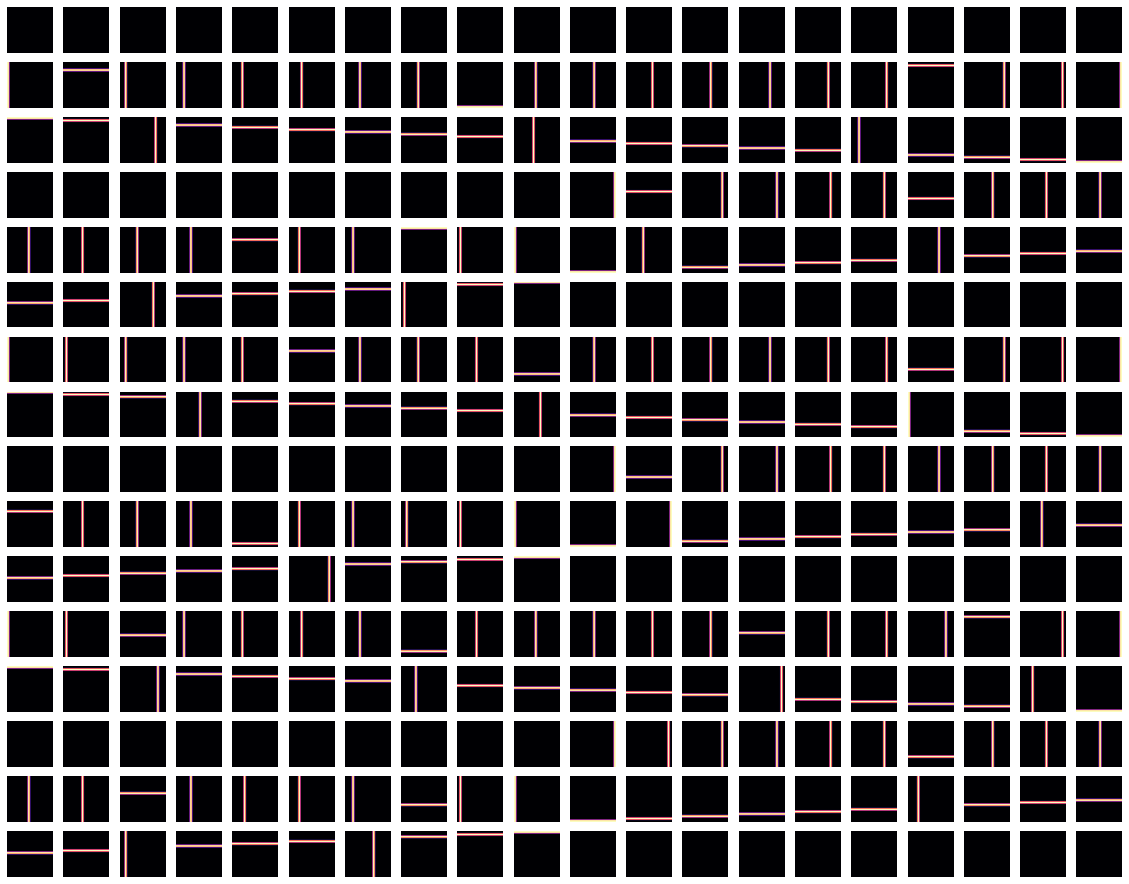

In [22]:
run, violations, total = create_violated_run(standard_run)

# np.set_printoptions(threshold=np.inf)
# print(run)

show_runs(run)